# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

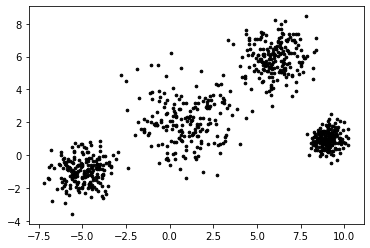

In [2]:

center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed =5
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

## First I create some functions and specify the colour scheme 

In [32]:
colours = ['g','b','y','c']
def createFirstCentres(k,c,data,seed=6):
    np.random.seed = seed
    centres = np.random.randn(k,c)*np.std(data)+np.mean(data)
    return centres
def plotFirstCentres(centres):
    colours = ['g','b','y','c']
    centres = pd.DataFrame(centres, columns=['x','y'])
    centres['clusters'] = range(4)
    kwargs = {'edgecolor':"r", # for edge color
              'linewidth':1, # line width of spot
              'linestyle':'-', # line style of spot
             }
    sns.scatterplot(x='x',y='y',hue='clusters',data=centres,palette=colours, **kwargs)
    return centres

def getClosestCentroid(point, centres):
    dist = []
    for c in centres:
        dist.append(np.linalg.norm(point-c))
    return dist.index(min(dist))

def getCluster(data,centres): ##
    cluster = []
    for point in data:
        cluster.append(getClosestCentroid(point,centres))
    return cluster

def relocateCentroids(df,c):
    c1 = df[df['clusters']==c]
    c1_x = c1.iloc[:,0].mean()
    c1_y = c1.iloc[:,1].mean()
    centroid = [c1_x,c1_y]
    return centroid

def placeCentroids(df):
    colours = ['g','b','y','c']
    centroids = []
    for i in range(4):
        centroids.append(relocateCentroids(df,i))

    df = pd.DataFrame(centroids, columns=['x','y','clusters'])
    kwargs  =   {'edgecolor':"r", # for edge color
                 'linewidth':1, # line width of spot
                 'linestyle':'-', # line style of spot
                }
    sns.scatterplot(x='x',y='y',hue='clusters',data=df,palette=colours, **kwargs)

def getPoints(data,c):
    x,y = data[:,0], data[:,1]
    df = pd.DataFrame({'x':x,'y':y,'clusters':c})
    return df
    
def plotPoints(df):
    x,y = data[:,0],data[:,1]
    sns.scatterplot(x='x',y='y',hue='clusters',data=df,palette=colours,legend=False)
    
def plotNewCentres(df):
    new_centres = []
    for c in range(4):
        relocateCentroids(df,c)
        new_centres.append(relocateCentroids(df,c))
    return new_centres
    
centres = createFirstCentres(4,2,data)  ##Randomise the first centres\

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

[[ 1.24821766 -2.19138155]
 [ 2.17250193  8.22366994]
 [ 7.2391648   5.81907324]
 [ 1.53507195  8.16579807]]


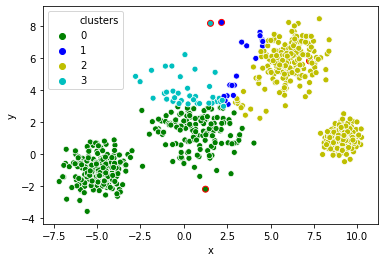

In [46]:
plotFirstCentres(centres) ##Plots these centres on a scatterplot
c = getCluster(data,centres)
df = getPoints(data,c) ##creates a dataframe with the data points and clusters based on centroids
plotPoints(df) ## Plots these data points
print(centres)

[[-2.586232100682121, -0.005111273766509704], [3.3781871539114086, 5.3403634509333395], [7.491926024283021, 3.376722632687493], [0.2400945486063716, 3.901694061879952]]


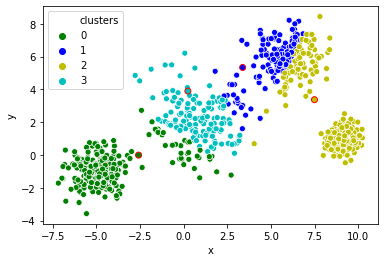

In [45]:
new_centres = plotNewCentres(df)
c1 = getCluster(data,new_centres)
df1 = getPoints(data,c1)
plotPoints(df1)
plotFirstCentres(new_centres)
print(new_centres)

[[-4.215884678888362, -0.7896403336062132], [5.075968790276418, 5.749937386752025], [8.342730073790985, 2.36331564486359], [0.8231533975436112, 2.3132378884395264]]


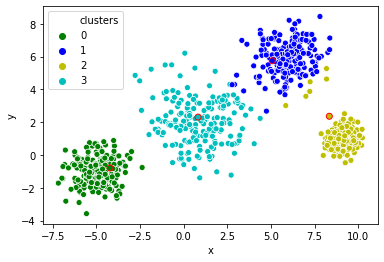

In [44]:
new_centres = plotNewCentres(df1)
c2 = getCluster(data,new_centres)
df2 = getPoints(data,c2)
plotPoints(df2)
plotFirstCentres(new_centres)
print(new_centres)

[[-4.928961587717002, -0.9904467153690447], [5.930493866461868, 5.923579991995297], [8.998452416854946, 1.0654567016845597], [0.8678064002908081, 2.0262740998445445]]


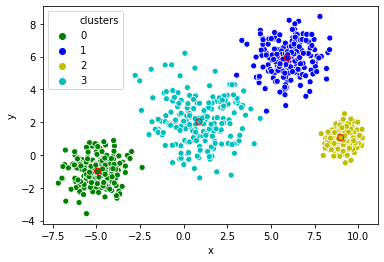

In [47]:
new_centres = plotNewCentres(df2)
c3 = getCluster(data,new_centres)
df3 = getPoints(data,c3)
plotPoints(df3)
plotFirstCentres(new_centres)
print(new_centres)

[[-4.928961587717002, -0.9904467153690447], [6.012683890365731, 5.897050577896992], [9.050006873874441, 0.9731318679315163], [0.9014051498814507, 2.0593676316035694]]


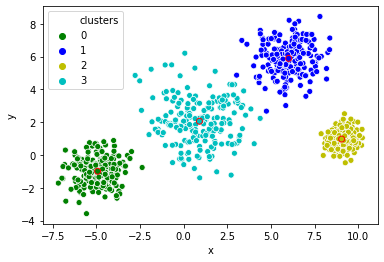

In [48]:
new_centres = plotNewCentres(df3)
c4 = getCluster(data,new_centres)
df4 = getPoints(data,c4)
plotPoints(df4)
plotFirstCentres(new_centres)
print(new_centres)

[[-4.928961587717002, -0.9904467153690447], [6.012683890365731, 5.897050577896992], [9.050006873874441, 0.9731318679315163], [0.9014051498814507, 2.0593676316035694]]


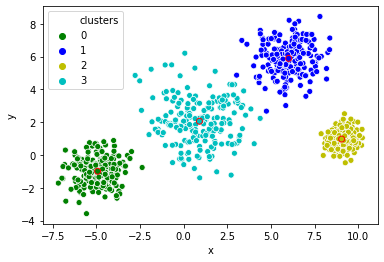

In [49]:
new_centres = plotNewCentres(df4)
c5 = getCluster(data,new_centres)
df5 = getPoints(data,c5)
plotPoints(df5)
plotFirstCentres(new_centres)
print(new_centres)